In [1]:
!python -V

Python 3.9.16


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [3]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


In [4]:
df = pd.read_parquet('/home/brandon/MLOps Zoomcamp/yellow_tripdata_2022-01.parquet')

In [5]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN


In [6]:
df.columns.value_counts()

VendorID                 1
fare_amount              1
congestion_surcharge     1
total_amount             1
improvement_surcharge    1
tolls_amount             1
tip_amount               1
mta_tax                  1
extra                    1
payment_type             1
tpep_pickup_datetime     1
DOLocationID             1
PULocationID             1
store_and_fwd_flag       1
RatecodeID               1
trip_distance            1
passenger_count          1
tpep_dropoff_datetime    1
airport_fee              1
dtype: int64

In [7]:
df.tpep_pickup_datetime = pd.to_datetime(df['tpep_pickup_datetime'])
df.tpep_dropoff_datetime = pd.to_datetime(df['tpep_dropoff_datetime'])

In [8]:
df['duration'] = df.tpep_dropoff_datetime -df.tpep_pickup_datetime

In [9]:
td = df.duration.iloc[0]

In [10]:
td.total_seconds() / 60

17.816666666666666

In [11]:
df.duration.apply(lambda td: td.total_seconds() / 60)

0          17.816667
1           8.400000
2           8.966667
3          10.033333
4          37.533333
             ...    
2463926     5.966667
2463927    10.650000
2463928    11.000000
2463929    12.050000
2463930    27.000000
Name: duration, Length: 2463931, dtype: float64

In [12]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,0 days 00:17:49
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,0 days 00:08:24
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,0 days 00:08:58
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,0 days 00:10:02
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,0 days 00:37:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN,0 days 00:05:58
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN,0 days 00:10:39
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN,0 days 00:11:00
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN,0 days 00:12:03


/tmp/ipykernel_8707/3426635498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<AxesSubplot: xlabel='duration', ylabel='Density'>

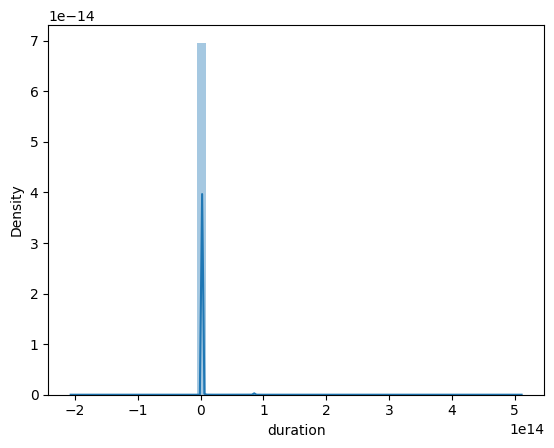

In [13]:
sns.distplot(df.duration)

In [14]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count                      2463931
mean     0 days 00:14:12.732175129
std      0 days 00:46:26.718308266
min              -3 days +14:37:36
50%                0 days 00:10:11
95%                0 days 00:31:56
98%                0 days 00:42:09
99%                0 days 00:50:51
max                5 days 21:53:11
Name: duration, dtype: object

In [15]:
df = df[(df.duration >= '0 days 01:00:00') & (df.duration <= '0 days 60:00:00')]

In [16]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
70,2,2022-01-01 00:31:12,2022-01-02 00:00:58,1.0,3.03,1.0,N,79,261,2,15.00,0.5,0.5,0.00,0.00,0.3,18.80,2.5,0.0,0 days 23:29:46
481,2,2022-01-01 00:15:34,2022-01-01 01:29:42,6.0,16.21,1.0,N,161,134,1,60.50,0.5,0.5,14.17,6.55,0.3,85.02,2.5,0.0,0 days 01:14:08
575,2,2022-01-01 00:17:11,2022-01-01 23:52:41,1.0,1.48,1.0,N,142,48,1,10.50,0.5,0.5,0.00,0.00,0.3,14.30,2.5,0.0,0 days 23:35:30
1050,2,2022-01-01 00:35:28,2022-01-02 00:03:07,1.0,4.73,1.0,N,142,125,2,19.00,0.5,0.5,0.00,0.00,0.3,22.80,2.5,0.0,0 days 23:27:39
1368,2,2022-01-01 00:53:25,2022-01-02 00:50:13,1.0,3.02,1.0,N,68,45,1,13.00,0.5,0.5,4.20,0.00,0.3,21.00,2.5,0.0,0 days 23:56:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463360,6,2022-01-31 19:01:10,2022-01-31 20:01:37,NaN,4.71,NaN,None,265,42,0,16.75,0.0,0.5,0.00,0.00,0.3,17.55,NaN,NaN,0 days 01:00:27
2463361,6,2022-01-31 19:01:34,2022-01-31 20:01:41,NaN,7.60,NaN,None,265,152,0,24.43,0.0,0.5,0.00,0.00,0.3,25.23,NaN,NaN,0 days 01:00:07
2463532,6,2022-01-31 20:01:41,2022-01-31 21:01:55,NaN,11.08,NaN,None,265,69,0,43.20,0.0,0.5,0.00,0.00,0.3,44.00,NaN,NaN,0 days 01:00:14
2463557,6,2022-01-31 20:01:03,2022-01-31 21:01:59,NaN,7.63,NaN,None,265,76,0,45.20,0.0,0.5,0.00,0.00,0.3,46.00,NaN,NaN,0 days 01:00:56


In [17]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']


In [18]:
df[categorical] = df[categorical].astype('str')

/tmp/ipykernel_8707/790595652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype('str')


In [19]:
df[categorical].dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [20]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [21]:
dv = DictVectorizer()
x_train = dv.fit_transform(train_dicts)

In [22]:
x_train

<12564x477 sparse matrix of type '<class 'numpy.float64'>'
	with 37692 stored elements in Compressed Sparse Row format>

In [23]:
target = 'duration'
y_train = df[target].values

In [24]:
y_train

array([84586000000000,  4448000000000, 84930000000000, ...,
        3614000000000,  3656000000000,  7233000000000],
      dtype='timedelta64[ns]')

In [25]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [26]:
y_pred = lr.predict(x_train)

/tmp/ipykernel_8707/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_8707/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


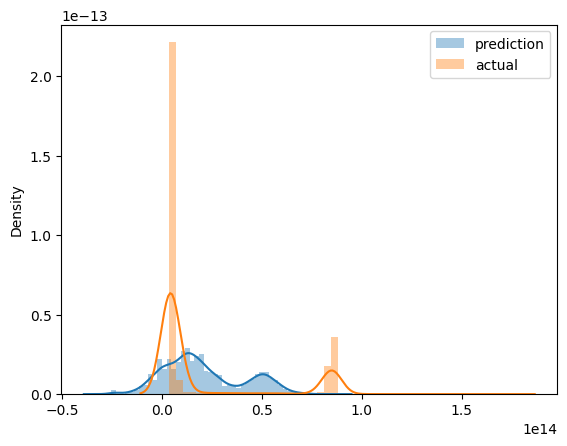

In [27]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [28]:


# Convert timedelta values to numerical representations (seconds)
y_train_seconds = pd.to_timedelta(y_train).total_seconds()
y_pred_seconds = pd.to_timedelta(y_pred).total_seconds()

# Calculate mean squared error
mse = mean_squared_error(y_train_seconds, y_pred_seconds, squared=False)





In [29]:
#Print mintues instead of seconds
print(f'MSE: {mse / 60:.2f} minutes')


MSE: 411.34 minutes


In [30]:
lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train)

y_pred = lasso.predict(x_train)

/home/brandon/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6240282873365766e+30, tolerance: 1.259629306361064e+27
  model = cd_fast.sparse_enet_coordinate_descent(


In [31]:
#Put all previous code into a function
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    
    df.tpep_dropoff_datetime = pd.to_datetime(df['tpep_dropoff_datetime'])
    df.tpep_pickup_datetime = pd.to_datetime(df['tpep_pickup_datetime'])
    
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    
    df = df[(df.duration >= 0) & (df.duration <= 60)]
    
    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype('str')
    
    return df

In [32]:
df_train = read_dataframe('/home/brandon/MLOps Zoomcamp/yellow_tripdata_2022-01.parquet')
df_val = read_dataframe('/home/brandon/MLOps Zoomcamp/yellow_tripdata_2022-02.parquet')

In [33]:
len(df_train), len(df_val)

(2450090, 2950274)

In [34]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
x_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
x_val = dv.transform(val_dicts)

target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_val)

mse = mean_squared_error(y_val, y_pred, squared=False)

In [35]:
print(f'MSE: {mse / 60:.2f} minutes')

MSE: 0.13 minutes


In [36]:
lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train)

y_pred = lasso.predict(x_val)

mse = mean_squared_error(y_val, y_pred, squared=False)

In [37]:
print(f'MSE: {mse / 60:.2f} minutes')

MSE: 0.16 minutes


In [38]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_val)

mse = mean_squared_error(y_val, y_pred, squared=False)

In [39]:
print(f'MSE: {mse / 60:.2f} minutes')

MSE: 0.13 minutes


In [40]:
#try pick up and drop off location as a feature

df_train['PU_DO'] = df_train.PULocationID + '_' + df_train.DOLocationID
df_val['PU_DO'] = df_val.PULocationID + '_' + df_val.DOLocationID

In [41]:
df_val

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration,PU_DO
0,1,2022-02-01 00:06:58,2022-02-01 00:19:24,1.0,5.40,1.0,N,138,252,1,...,1.75,0.5,3.90,0.00,0.3,23.45,0.0,1.25,12.433333,138_252
1,1,2022-02-01 00:38:22,2022-02-01 00:55:55,1.0,6.40,1.0,N,138,41,2,...,1.75,0.5,0.00,6.55,0.3,30.10,0.0,1.25,17.550000,138_41
2,1,2022-02-01 00:03:20,2022-02-01 00:26:59,1.0,12.50,1.0,N,138,200,2,...,1.75,0.5,0.00,6.55,0.3,44.60,0.0,1.25,23.650000,138_200
3,2,2022-02-01 00:08:00,2022-02-01 00:28:05,1.0,9.88,1.0,N,239,200,2,...,0.50,0.5,0.00,3.00,0.3,34.80,2.5,0.00,20.083333,239_200
4,2,2022-02-01 00:06:48,2022-02-01 00:33:07,1.0,12.16,1.0,N,138,125,1,...,0.50,0.5,8.11,0.00,0.3,48.66,2.5,1.25,26.316667,138_125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979426,2,2022-02-28 23:50:00,2022-03-01 00:06:00,NaN,3.40,NaN,None,163,193,0,...,0.00,0.5,0.00,0.00,0.3,17.67,NaN,NaN,16.000000,163_193
2979427,2,2022-02-28 23:06:57,2022-02-28 23:19:12,NaN,3.48,NaN,None,141,4,0,...,0.00,0.5,2.00,0.00,0.3,19.81,NaN,NaN,12.250000,141_4
2979428,2,2022-02-28 23:48:13,2022-03-01 00:03:33,NaN,3.05,NaN,None,161,151,0,...,0.00,0.5,3.81,0.00,0.3,21.49,NaN,NaN,15.333333,161_151
2979429,2,2022-02-28 23:56:41,2022-03-01 00:04:57,NaN,2.62,NaN,None,141,226,0,...,0.00,0.5,1.71,0.00,0.3,17.54,NaN,NaN,8.266667,141_226


In [42]:
categorical = ['PU_DO']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
x_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
x_val = dv.transform(val_dicts)

target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_val)

mse = mean_squared_error(y_val, y_pred, squared=False)

In [43]:
print(f'MSE: {mse / 60:.2f} minutes')

MSE: 0.09 minutes


In [44]:
lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train)

y_pred = lasso.predict(x_val)

mse = mean_squared_error(y_val, y_pred, squared=False)

In [45]:
print(f'MSE: {mse / 60:.2f} minutes')

MSE: 0.16 minutes


In [46]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_val)

mse = mean_squared_error(y_val, y_pred, squared=False)

In [47]:
print(f'MSE: {mse / 60:.2f} minutes')

MSE: 0.09 minutes


In [48]:
#save model
with open('model1.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [49]:
df_train = df_train.sample(n=20_000, random_state=1)

In [50]:
#Experiment with PyCaret
from pycaret.regression import *

In [51]:
setup(data=df_train, target='duration', session_id=42)

In [52]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:52:38
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [54]:
lr = create_model('lr')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:00:30
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0759,23.2644,4.8233,0.6965,0.3901,1.6464
1,3.1699,24.2564,4.9251,0.7032,0.4033,1.2614
2,2.9807,22.5144,4.7449,0.7216,0.3769,1.9729
3,3.0100,21.1959,4.6039,0.7358,0.3885,1.8127
4,2.9411,20.4473,4.5219,0.7601,0.3320,0.8460
5,3.1758,32.4231,5.6941,0.6158,0.4103,1.7604
6,2.9346,18.9211,4.3498,0.7603,0.3633,0.9712
7,3.0104,23.3436,4.8315,0.7224,0.3794,0.8473
8,2.8202,17.8548,4.2255,0.7626,0.3672,1.0068


In [55]:
ridge = create_model('ridge')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:00:42
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.1062,23.5879,4.8567,0.6923,0.3933,1.6697
1,3.1796,24.0512,4.9042,0.7057,0.4038,1.2690
2,3.0032,22.6916,4.7636,0.7194,0.3827,1.9989
3,3.0309,21.3009,4.6153,0.7345,0.3886,1.7958
4,2.9612,20.3718,4.5135,0.7609,0.3336,0.8329
5,3.1992,31.4278,5.6061,0.6276,0.4116,1.6557
6,2.9664,19.1734,4.3787,0.7571,0.3669,1.0222
7,3.0353,23.6407,4.8622,0.7189,0.3820,0.8548
8,2.8488,18.2076,4.2670,0.7579,0.3665,0.9872


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [56]:
lasso = create_model('lasso')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:00:52
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


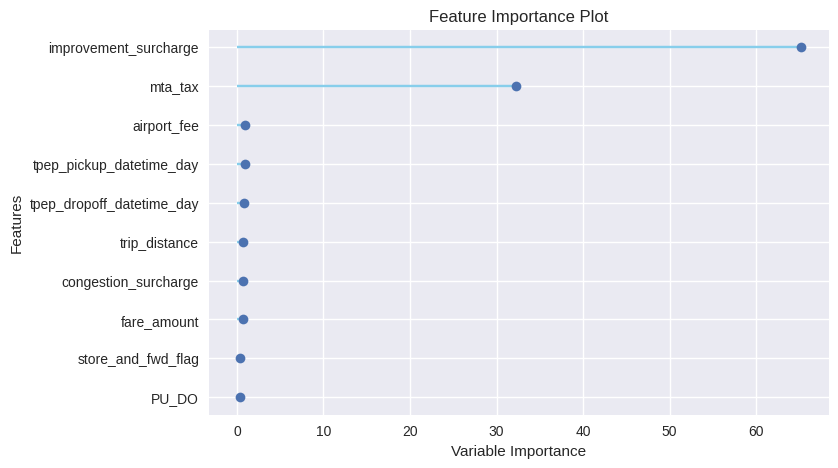

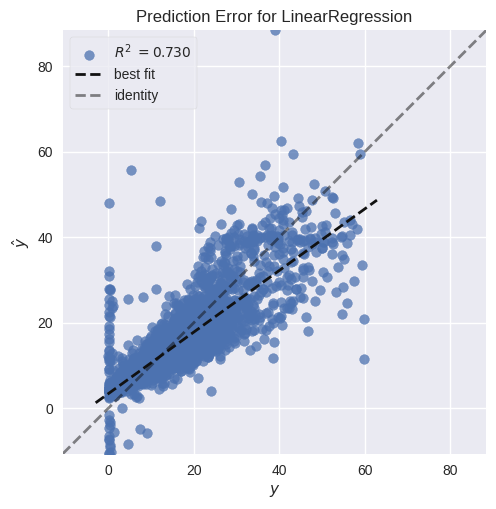

,Parameters
copy_X,True
fit_intercept,True
n_jobs,-1
positive,False


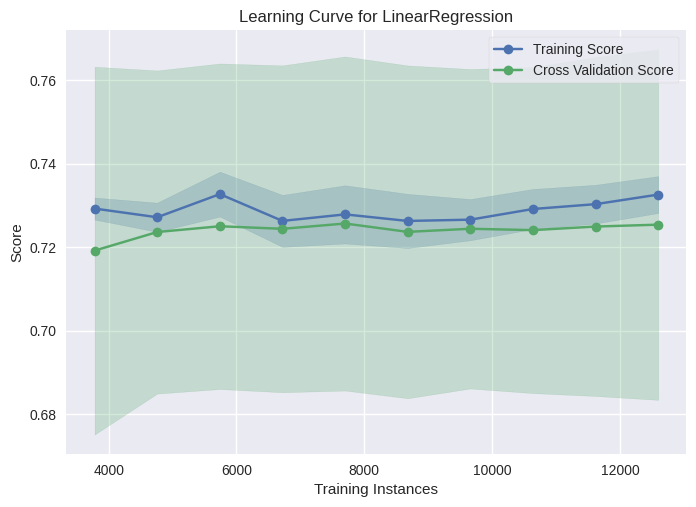

In [65]:
plot_model(lr, plot='feature')
plot_model(lr, plot='error')
plot_model(lr, plot='parameter')
plot_model(lr, plot='learning')


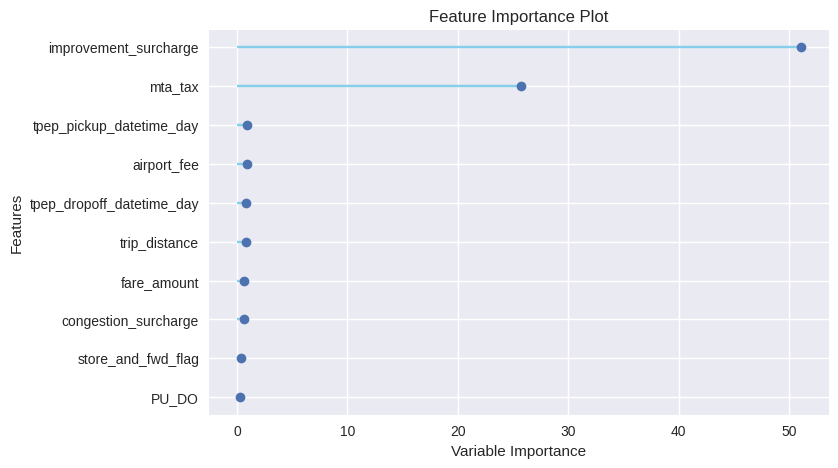

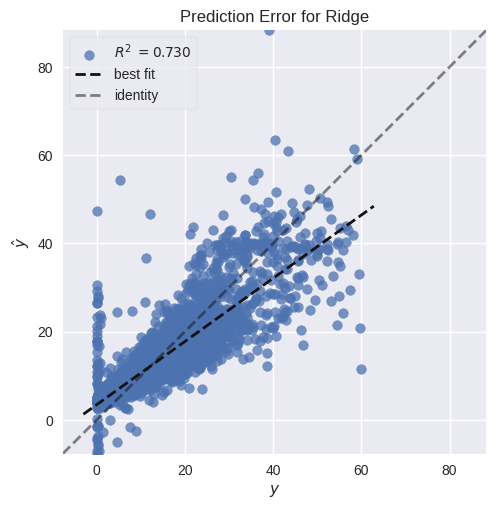

,Parameters
alpha,1.0
copy_X,True
fit_intercept,True
max_iter,None
positive,False
random_state,42
solver,auto
tol,0.0001


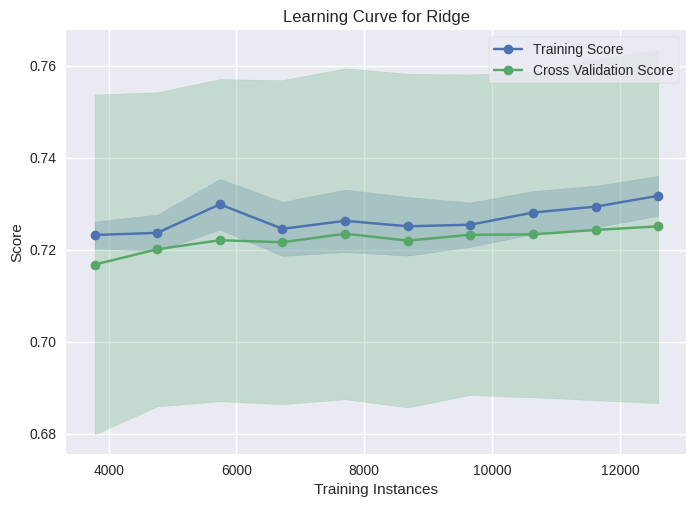

In [66]:
plot_model(ridge, plot='feature')
plot_model(ridge, plot='error')
plot_model(ridge, plot='parameter')
plot_model(ridge, plot='learning')

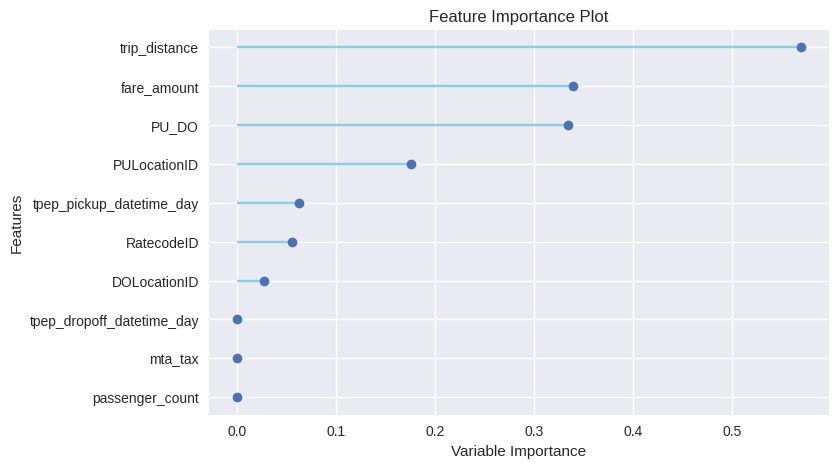

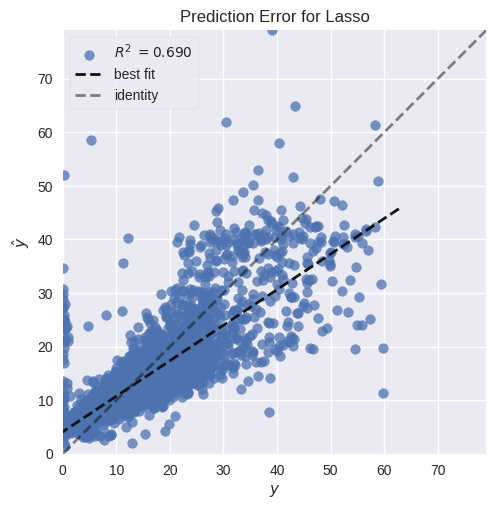

,Parameters
alpha,1.0
copy_X,True
fit_intercept,True
max_iter,1000
positive,False
precompute,False
random_state,42
selection,cyclic
tol,0.0001
warm_start,False


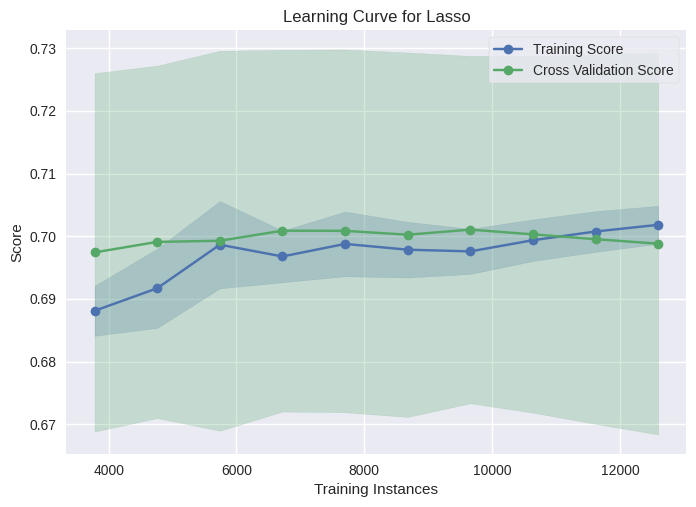

In [67]:
plot_model(lasso, plot='feature')
plot_model(lasso, plot='error')
plot_model(lasso, plot='parameter')
plot_model(lasso, plot='learning')

In [70]:
predict_model(lr)
predict_model(ridge)
predict_model(lasso)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,2.9657,21.3433,4.6199,0.7303,0.3844,1.5128


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,2.9778,21.3486,4.6205,0.7302,0.3830,1.4887


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,3.1960,24.5721,4.9570,0.6895,0.4153,1.9434


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PU_DO,duration,prediction_label
14000,2,2022-01-15 20:50:18,2022-01-15 21:04:55,1.0,2.56,1.0,N,186,141,1,...,0.5,1.00,0.0,0.3,16.299999,2.5,0.0,186_141,14.616667,13.217827
14001,2,2022-01-15 03:27:12,2022-01-15 03:38:24,1.0,2.25,1.0,N,79,90,1,...,0.5,3.45,0.0,0.3,17.250000,2.5,0.0,79_90,11.200000,10.910857
14002,2,2022-01-10 10:29:47,2022-01-10 10:55:52,1.0,3.10,1.0,N,143,162,2,...,0.5,0.00,0.0,0.3,16.799999,2.5,0.0,143_162,26.083334,13.397337
14003,1,2022-01-25 08:29:21,2022-01-25 08:36:00,0.0,1.00,1.0,N,229,237,1,...,0.5,2.45,0.0,0.3,12.250000,2.5,0.0,229_237,6.650000,8.292283
14004,2,2022-01-07 16:33:06,2022-01-07 16:36:26,1.0,1.00,1.0,N,264,264,1,...,0.5,1.86,0.0,0.3,11.160000,2.5,0.0,264_264,3.333333,7.309864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,2022-01-08 00:31:27,2022-01-08 00:33:46,1.0,0.30,1.0,N,246,68,3,...,0.5,0.00,0.0,0.3,7.300000,2.5,0.0,246_68,2.316667,5.140245
19996,2,2022-01-13 20:03:37,2022-01-13 20:11:56,1.0,1.34,1.0,N,113,170,1,...,0.5,2.26,0.0,0.3,13.560000,2.5,0.0,113_170,8.316667,9.732448
19997,1,2022-01-10 16:45:42,2022-01-10 17:00:02,2.0,2.80,1.0,N,161,79,1,...,0.5,0.00,0.0,0.3,16.299999,2.5,0.0,161_79,14.333333,13.026214
19998,2,2022-01-15 03:41:13,2022-01-15 03:41:17,5.0,0.00,1.0,N,233,264,3,...,-0.5,-0.95,0.0,-0.3,-4.750000,0.0,0.0,233_264,0.066667,6.187525


In [72]:
df_val = df_val.sample(n=20_000, random_state=1)

In [73]:
#predict on validation set
predict_model(lr, data=df_val)
predict_model(ridge, data=df_val)
predict_model(lasso, data=df_val)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,3.8077,36.1142,6.0095,0.6310,0.4002,1.2396


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,3.8367,36.2711,6.0226,0.6294,0.4029,1.2281


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,4.0422,39.2687,6.2665,0.5988,0.4254,1.4393


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PU_DO,duration,prediction_label
0,1,2022-02-09 08:56:03,2022-02-09 09:07:16,3.0,1.70,1.0,N,237,236,1,...,0.5,2.46,0.0,0.3,14.760000,2.5,0.0,237_236,11.216666,8.768399
1,2,2022-02-15 21:52:03,2022-02-15 22:01:45,1.0,1.98,1.0,N,90,107,1,...,0.5,2.56,0.0,0.3,15.360000,2.5,0.0,90_107,9.700000,9.378112
2,1,2022-02-28 13:26:05,2022-02-28 13:26:35,1.0,12.90,5.0,N,265,265,1,...,0.0,0.00,0.0,0.3,115.300003,0.0,0.0,265_265,0.500000,48.252813
3,2,2022-02-15 23:21:02,2022-02-15 23:33:27,1.0,1.57,1.0,N,186,233,1,...,0.5,2.56,0.0,0.3,15.360000,2.5,0.0,186_233,12.416667,10.230563
4,2,2022-02-24 14:38:15,2022-02-24 14:44:37,2.0,1.23,1.0,N,90,158,1,...,0.5,2.00,0.0,0.3,11.800000,2.5,0.0,90_158,6.366667,8.171912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,2022-02-14 07:04:17,2022-02-14 07:11:44,1.0,1.60,1.0,N,100,249,2,...,0.5,0.00,0.0,0.3,10.800000,2.5,0.0,100_249,7.450000,10.379131
19996,2,2022-02-08 14:58:58,2022-02-08 15:09:54,2.0,1.74,1.0,N,211,234,1,...,0.5,2.46,0.0,0.3,14.760000,2.5,0.0,211_234,10.933333,9.290158
19997,2,2022-02-09 22:12:29,2022-02-09 22:27:30,1.0,3.48,1.0,N,249,50,1,...,0.5,3.56,0.0,0.3,21.360001,2.5,0.0,249_50,15.016666,12.118456
19998,2,2022-02-12 22:36:46,2022-02-12 23:04:54,4.0,6.41,1.0,N,79,193,1,...,0.5,5.46,0.0,0.3,32.759998,2.5,0.0,79_193,28.133333,18.071008


In [74]:
#predict on stacked model
stacker = stack_models(estimator_list=[lr, ridge, lasso])

predict_model(stacker, data=df_val)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:12:13
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0721,23.6270,4.8608,0.6917,0.3933,1.7663
1,3.1493,24.2897,4.9285,0.7028,0.4091,1.3267
2,2.9548,22.3303,4.7255,0.7239,0.3775,2.0920
3,2.9833,21.0995,4.5934,0.7370,0.3885,1.8926
4,2.9087,20.1539,4.4893,0.7635,0.3294,0.8553
5,3.1658,33.0938,5.7527,0.6078,0.4105,1.8115
6,2.9141,19.0335,4.3627,0.7589,0.3676,1.1048
7,2.9851,23.4743,4.8450,0.7209,0.3873,0.8960
8,2.8073,17.6822,4.2050,0.7649,0.3639,0.9614


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,3.7731,35.9851,5.9988,0.6324,0.3995,1.2939


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PU_DO,duration,prediction_label
0,1,2022-02-09 08:56:03,2022-02-09 09:07:16,3.0,1.70,1.0,N,237,236,1,...,0.5,2.46,0.0,0.3,14.760000,2.5,0.0,237_236,11.216666,9.025422
1,2,2022-02-15 21:52:03,2022-02-15 22:01:45,1.0,1.98,1.0,N,90,107,1,...,0.5,2.56,0.0,0.3,15.360000,2.5,0.0,90_107,9.700000,9.362918
2,1,2022-02-28 13:26:05,2022-02-28 13:26:35,1.0,12.90,5.0,N,265,265,1,...,0.0,0.00,0.0,0.3,115.300003,0.0,0.0,265_265,0.500000,45.109824
3,2,2022-02-15 23:21:02,2022-02-15 23:33:27,1.0,1.57,1.0,N,186,233,1,...,0.5,2.56,0.0,0.3,15.360000,2.5,0.0,186_233,12.416667,9.932593
4,2,2022-02-24 14:38:15,2022-02-24 14:44:37,2.0,1.23,1.0,N,90,158,1,...,0.5,2.00,0.0,0.3,11.800000,2.5,0.0,90_158,6.366667,8.090835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,2022-02-14 07:04:17,2022-02-14 07:11:44,1.0,1.60,1.0,N,100,249,2,...,0.5,0.00,0.0,0.3,10.800000,2.5,0.0,100_249,7.450000,10.375201
19996,2,2022-02-08 14:58:58,2022-02-08 15:09:54,2.0,1.74,1.0,N,211,234,1,...,0.5,2.46,0.0,0.3,14.760000,2.5,0.0,211_234,10.933333,9.015113
19997,2,2022-02-09 22:12:29,2022-02-09 22:27:30,1.0,3.48,1.0,N,249,50,1,...,0.5,3.56,0.0,0.3,21.360001,2.5,0.0,249_50,15.016666,12.629226
19998,2,2022-02-12 22:36:46,2022-02-12 23:04:54,4.0,6.41,1.0,N,79,193,1,...,0.5,5.46,0.0,0.3,32.759998,2.5,0.0,79_193,28.133333,19.533936


In [75]:
#final model
final_model = finalize_model(stacker)

In [80]:
dashboard(stacker, display_format='inline')

Generating self.shap_explainer = shap.KernelExplainer(model, X)...
Building ExplainerDashboard..
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/6000 [00:00<?, ?it/s]